In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [2]:
data = pd.read_csv('solSentiment.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0,0.0,0.776819,0
1,2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0,0.0,0.882507,1
2,2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0,0.0,0.777832,0
3,2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0,0.0,0.661925,0
4,2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0,0.0,0.646651,0
...,...,...,...,...,...,...,...,...,...,...,...
1527,2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0,0.0,151.125504,1
1528,2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0,0.0,143.334274,0
1529,2024-06-17 00:00:00+00:00,151.137238,151.584778,140.138809,143.334274,2244770232,0.0,0.0,0.0,137.503998,0
1530,2024-06-18 00:00:00+00:00,143.314697,143.610657,130.289078,137.503998,4046511952,0.0,0.0,0.0,139.409683,1


In [3]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5374592833876222
Confusion Matrix:
[[90 73]
 [69 75]]


In [9]:
import pandas as pd

# Read the CSV file
data_from_sol = pd.read_csv("sol.csv")

# Get the last row
last_row_sol = data_from_sol.iloc[-1]

print("Last row from sol.csv:")
print(last_row_sol)


Last row from sol.csv:
Date            2024-06-19 00:00:00+00:00
Open                           137.479813
High                           141.633163
Low                            136.204514
Close                          139.409683
Volume                         3070086400
Dividends                             0.0
Stock Splits                          0.0
Name: 1531, dtype: object


In [10]:
import pandas as pd

# Read the CSV file for sentiment data related to 'sol'
sentiment_from_sol = pd.read_csv("solana_sentiment.csv")

# Get the last row
last_row_sol_sentiment = sentiment_from_sol.iloc[-1]

print("Last row from solana_sentiment.csv:")
print(last_row_sol_sentiment)


Last row from solana_sentiment.csv:
Unnamed: 0       2024-06-19
edit_count              0.0
sentiment               0.0
neg_sentiment           0.0
Name: 5553, dtype: object


In [11]:
# Function to fetch the latest data for Sol
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_sol['Open'],
        "high": last_row_sol['High'],
        "low": last_row_sol['Low'],
        "close": last_row_sol['Close'],
        "volume": last_row_sol['Volume'],
        "edit_count": last_row_sol_sentiment['edit_count'],
        "sentiment": last_row_sol_sentiment['sentiment'],
        "neg_sentiment": last_row_sol_sentiment['neg_sentiment']
    }
    return latest_data

In [12]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,137.479813,141.633163,136.204514,139.409683,3070086400,0.0,0.0,0.0


In [13]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Solana Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

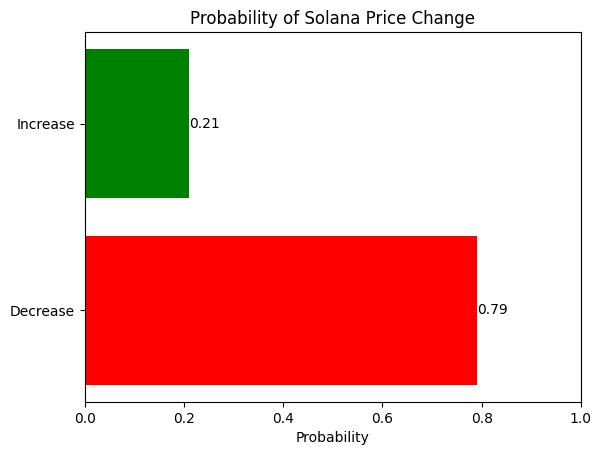

In [15]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [16]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.79
Probability of price increase: 0.21


In [17]:
import pickle 
with open('sol_prob.pkl', 'wb') as f:
    pickle.dump(model, f)